# Jon Williamson

## Preprocessing




In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading the data:

In [37]:
df = pd.read_csv('master_data4.csv', index_col=0)
df.fillna(0, inplace=True)
df.head(5)

,Coach Name,Year,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150,Avg 2Y Win Pct,Coach Tenure Class
0,Abe Gibron,1972,47,0,0,0,0,12,0,0,...,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0,0.267857,1
1,Adam Gase,2016,38,0,0,0,0,5,3,0,...,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0,0.500000,1
2,Adam Gase,2019,41,1,0,0,0,5,3,3,...,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0,0.281250,0
3,Adam Walsh,1945,44,0,8,0,12,0,0,0,...,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0,0.745455,0
4,Al Cornsweet,1931,25,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.200000,0


Because the feature names are complex, the stored data labels them only by feature number. The following table maps feature labels to descriptions of each feature.

There are many key takeaways from this set of features. Firstly, the feature set will be sparse for a given data point because no coach has ever been  an offensive coordinator and a defensive coordiantor prior to hiring. Secondly, features 9-140 and 142-150 were normalized using a z-score transformation vs. all teams in the league in that year. This normalization  roughly account for differences in play style over time because performance is always relative to other teams in the league at that time.

Prior to building the model, it is important to understand the distribution of data. The following code plots the distribution of average 2 year winning percentage for the entire data set.

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 13
plt.rc('axes', titlesize=18) 
plt.rc('axes', labelsize=18) 
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rcParams['font.family'] = "Times New Roman"

In [39]:
df = df[df['Coach Tenure Class'] != -1]
"""
temp_df = df.iloc[:,2:76].join(df.iloc[:,142:-2])
print(temp_df.head(5))
"""
X = df.iloc[:,2:-2]
y = df.iloc[:,-1]
X.head(5)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 141,Feature 142,Feature 143,Feature 144,Feature 145,Feature 146,Feature 147,Feature 148,Feature 149,Feature 150
0,47,0,0,0,0,12,0,0,0.000000,0.000000,...,0.428571,-0.956368,-0.046360,-1.485902,0.771470,-1.631151,0.145324,0.379353,0.653824,0.0
1,38,0,0,0,0,5,3,0,1.532619,1.348807,...,0.437500,-0.268496,0.327322,-0.366410,0.290591,-0.152661,-0.031052,-0.493436,-0.449901,0.0
2,41,1,0,0,0,5,3,3,1.532619,1.348807,...,0.281250,-0.656092,1.049007,-1.094508,0.825019,-0.949633,0.344443,-0.329186,0.910021,0.0
3,44,0,8,0,12,0,0,0,0.000000,0.000000,...,0.400000,0.116123,0.671841,-0.169465,1.121897,-0.060971,1.112303,1.146577,0.854598,0.0
4,25,0,0,0,0,0,0,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [40]:
y.head(5)

0    1
1    1
2    0
3    0
4    0
Name: Coach Tenure Class, dtype: int64

The `create_data.py` file segments coach tenure into three classes as such:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Coach Hire Duration (Years)</th>
    <th class="tg-fymr">Class Label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">1-2</td>
    <td class="tg-0pky">0</td>
  </tr>
  <tr>
    <td class="tg-c3ow">3-4</td>
    <td class="tg-0pky">1</td>
  </tr>
  <tr>
    <td class="tg-c3ow">5+</td>
    <td class="tg-0pky">2</td>
  </tr>
</tbody>
</table>

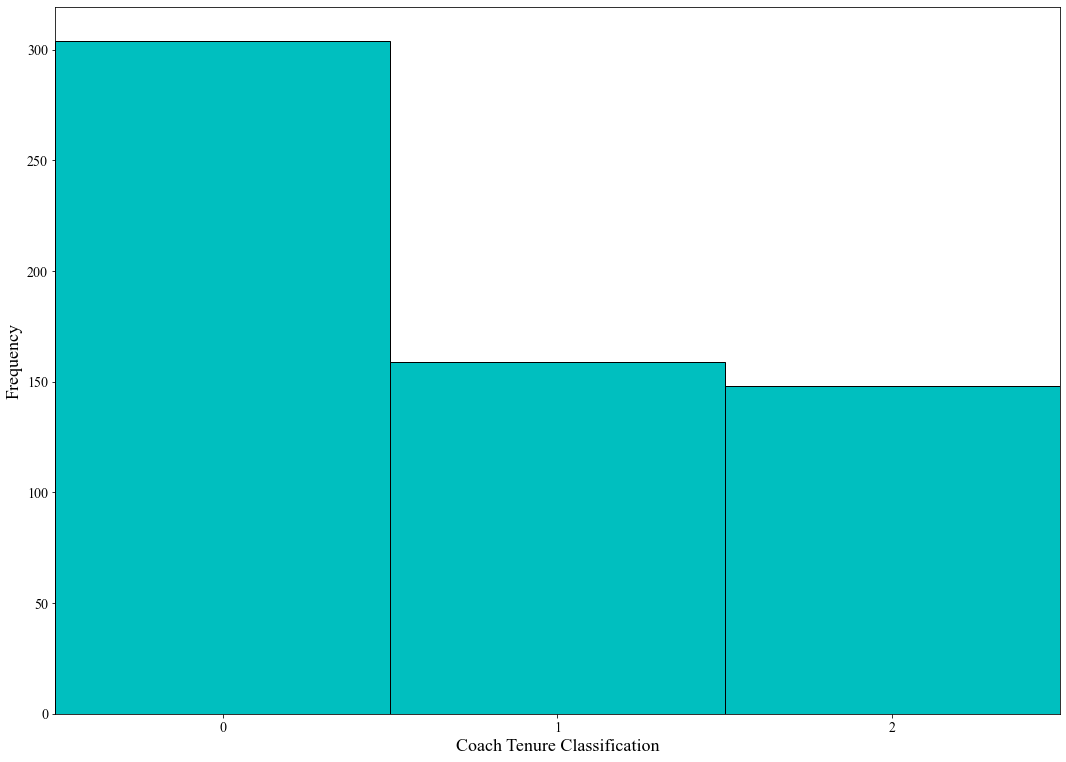

In [41]:
#rcParams['figure.figsize'] = 9, 6.5
raw_coach_class = y.values.T
raw_coach_class_mean = np.mean(raw_coach_class)
plt.hist(raw_coach_class, bins=[-.5,.5,1.5,2.5], color='c', edgecolor='k')
plt.xlim(-0.5,2.5)
plt.xticks(ticks=[0,1,2])
plt.xlabel('Coach Tenure Classification')
plt.ylabel('Frequency')
plt.show()

The following code prints the correlation matrix for the features. This matrix shows that the data is not highly correlated. The white boxes in the matrix show that that offensive and defensive coordinator metrics have no correlation. This is expected, as no coaches in the set were both an OC and a DC prior to being hired, hence there is no correlation value for those features. 

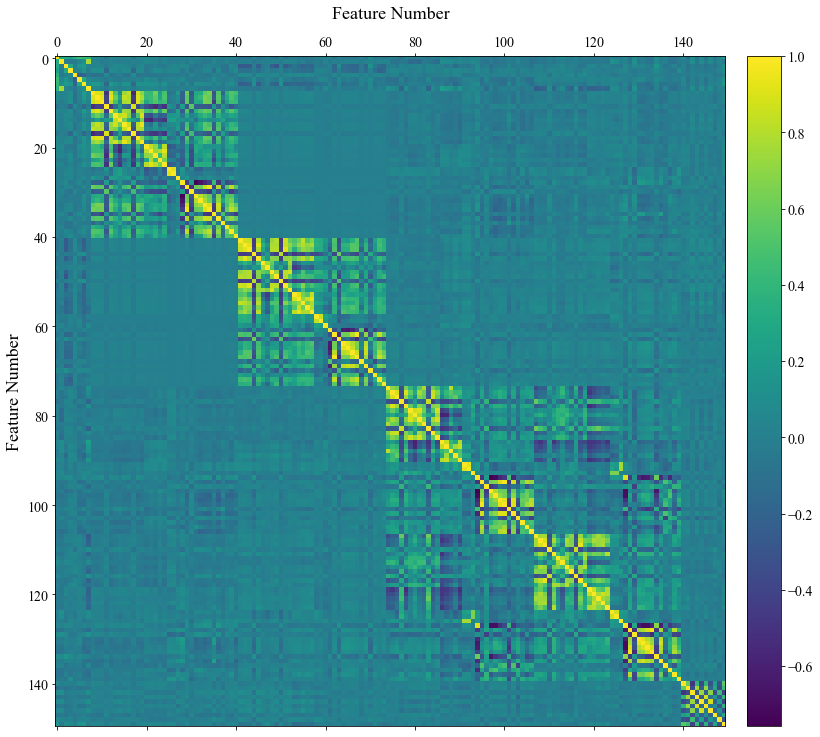

In [42]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.matshow(X.corr())
#plt.xticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
#plt.yticks([0,4,8,12,16,20,24], labels=[1,5,9,13,17,21,25])
plt.ylabel('Feature Number')
plt.xlabel('Feature Number', labelpad=-720)

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)

plt.colorbar(cax=cax)
#plt.clim(-1, 1)
plt.show()

Holding out 20% of data for testing:

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, shuffle=True, stratify=y, random_state=0)

## Model 1: Logistic Regression with Lasso Regularization

Necessary Imports:

In [44]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

The following code performs cross-validation to automatically detect hyperparameters to find the best model for each split. The `LassoCV` uses an internal 5-fold cross-validation to select the best $\alpha$ for regularization. The code runs an external 10-fold cross-validation to cross-validate the results. Note that there is still held out data from the original set. 

In [45]:
log_param_dict = {
    #"C":     [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]
    "C":     [.001, .01, .1, 1]
}

log_best_params_dict = {key: [] for key in log_param_dict.keys()}

log_result_dict = {     'train_score':  [],
                        'test_score':   [],
                        'coef_':        {
                            0: [],
                            1: [],
                            2: []
                        }
}

num_of_folds    = 10
max_iter        = 1e6

default_log_params = {
    'verbose':      False,
    'penalty':      'l1',
    'solver':       'saga',
    'n_jobs':       1,
    'multi_class':  'multinomial',
    'max_iter':     max_iter
}

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(LogisticRegression(**default_log_params), param_grid=log_param_dict, n_jobs=-1, cv=5, verbose=1, scoring='roc_auc_ovr').fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        log_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    log_result_dict['coef_'][0].append(best_model.coef_[0])
    log_result_dict['coef_'][1].append(best_model.coef_[1])
    log_result_dict['coef_'][2].append(best_model.coef_[2])

    log_result_dict['test_score'].append(roc_auc_score(y_test_, best_model.predict_proba(X_test__), average='macro', multi_class='ovr'))
    log_result_dict['train_score'].append(roc_auc_score(y_train_, best_model.predict_proba(X_train__), average='macro', multi_class='ovr'))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    3.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.8s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.6s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.0s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.9s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.7s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.4s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.9s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.2s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.8s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.1s finished


The following code prints the average AUROC value for each model on the train and test sets. Following this, the code plots a box plot for the absolute value of each coefficient for each class-specific regression. 

In [46]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(log_result_dict['train_score']), np.mean(log_result_dict['test_score'])))
print(log_best_params_dict)

Average Train AUROC: 0.686
Average Test AUROC: 0.649
{'C': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}


The following code plots the feature importance weights for each class for the ovr in the training method. 

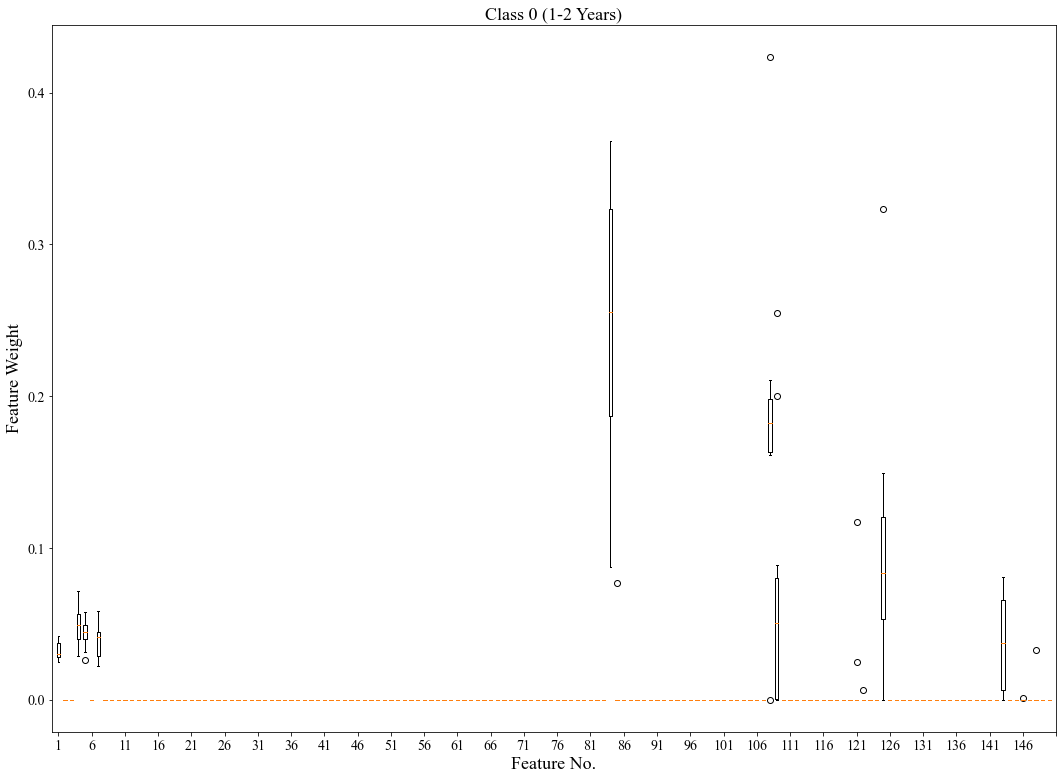

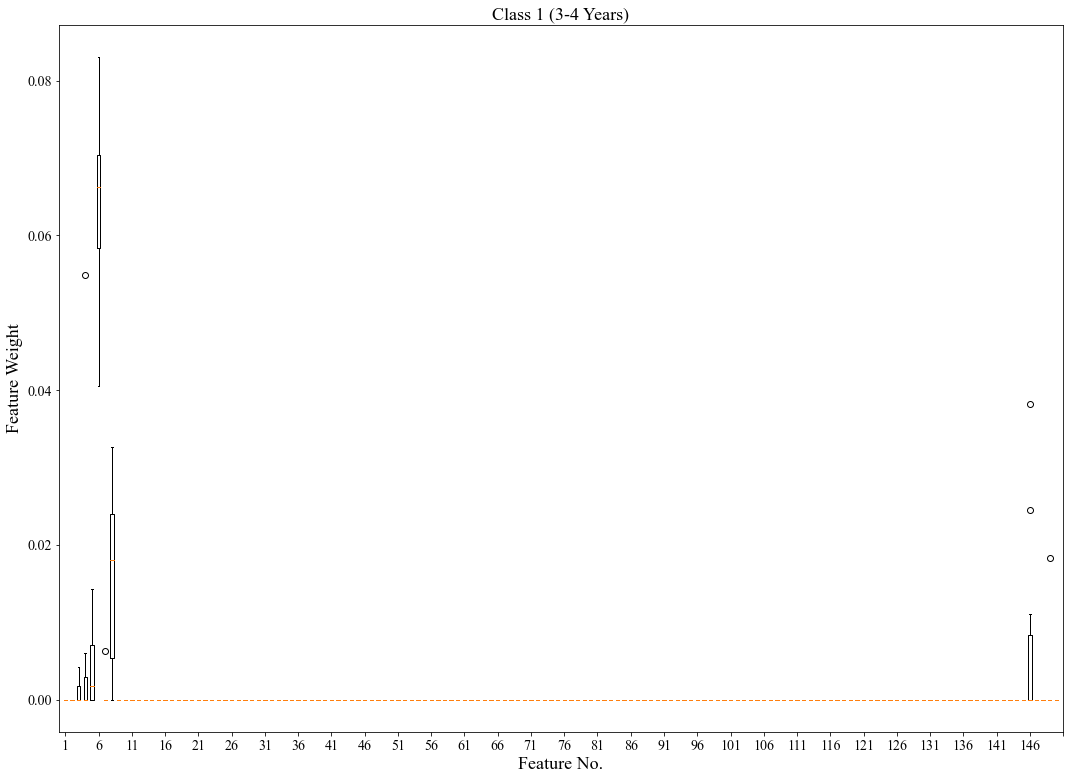

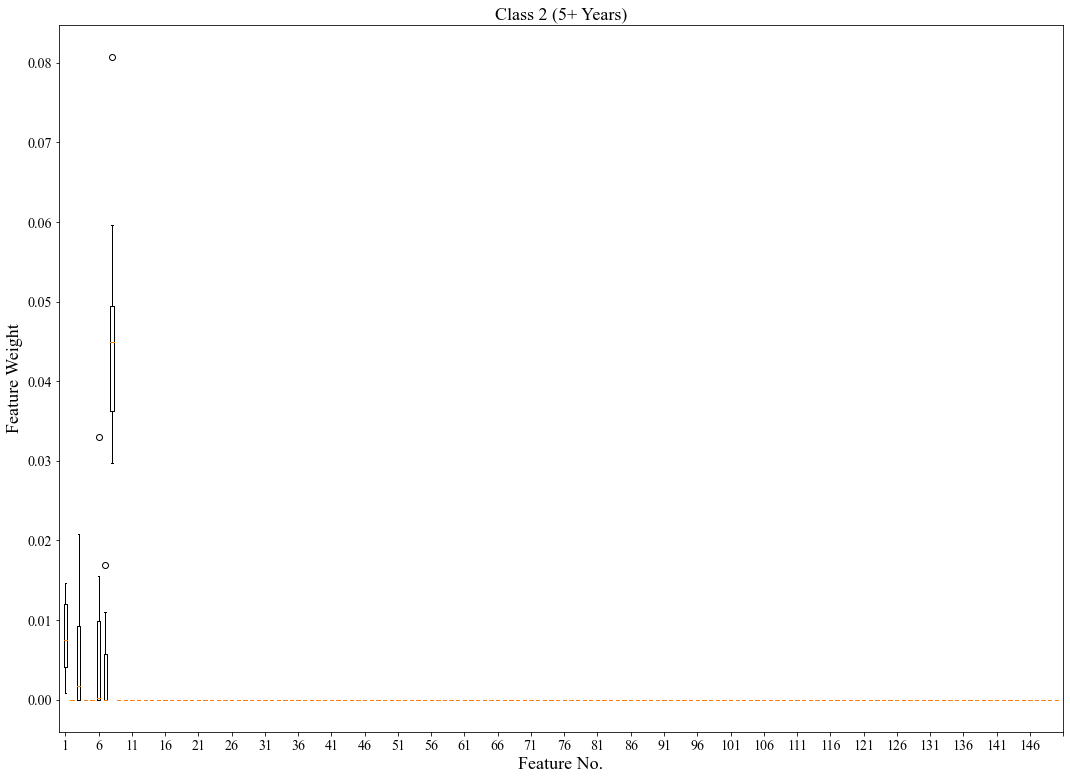

In [47]:
def plot_coef(coef_list_dict, title):
    coef_list = [np.abs(l) for l in zip(*coef_list_dict)]
    label_list = [item.split()[-1] for item in X.columns.values]
    label_list.append("")
    plt.boxplot(coef_list)
    plt.xlim(0, len(coef_list) + 1)
    #plt.xticks(np.arange(1, len(label_list) + 1), labels=label_list)
    plt.xticks(np.arange(1, len(label_list) + 1, 5), labels=label_list[::5])
    plt.xlabel('Feature No.')
    plt.ylabel('Feature Weight')
    plt.title(title)
    plt.show()
    
plot_coef(log_result_dict['coef_'][0], 'Class 0 (1-2 Years)')
plot_coef(log_result_dict['coef_'][1], 'Class 1 (3-4 Years)')
plot_coef(log_result_dict['coef_'][2], 'Class 2 (5+ Years)')

The following code prints the average (non-absolute) values for each ovr regression to compare feature importances across classes.

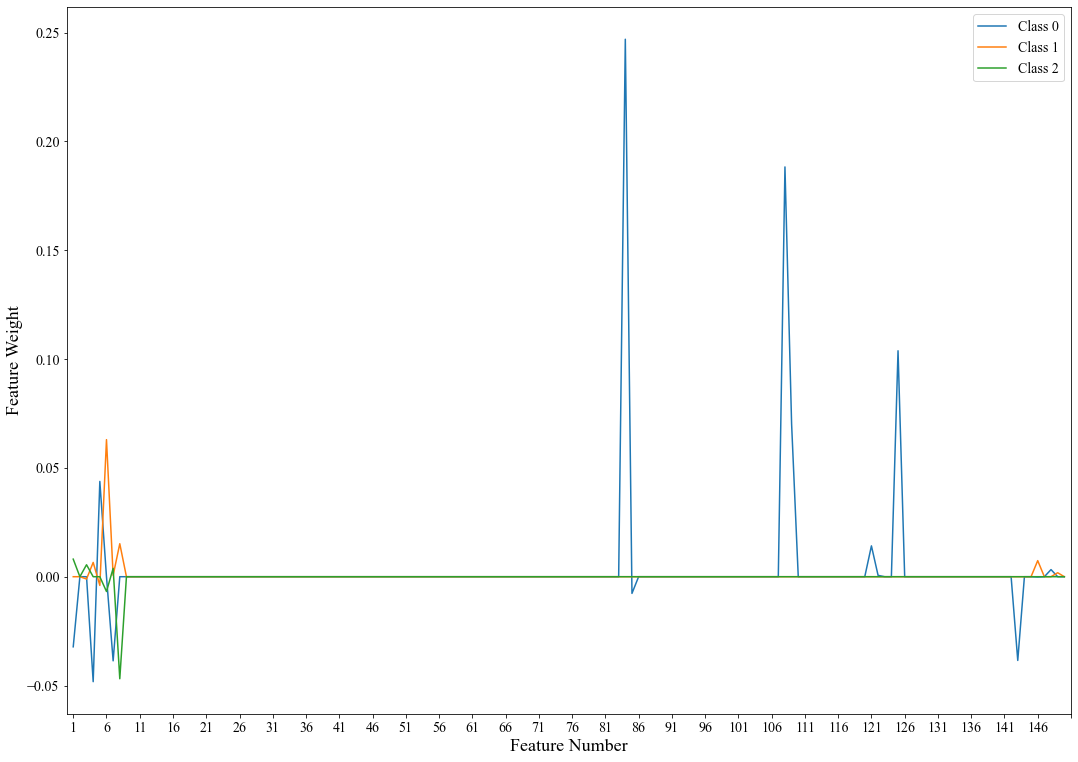

In [48]:
def plot_coefs(coef_list_dict_dict):
    count = 0
    for coef_list_dict in coef_list_dict_dict.values():
        coef_list = [np.mean(l) for l in zip(*coef_list_dict)]
        plt.plot(np.arange(1, len(coef_list) + 1), coef_list, label='Class {}'.format(count))
        count += 1
    label_list = [item.split()[-1] for item in X.columns.values]
    label_list.append("")
    plt.xlim(0, len(coef_list))
    #plt.xticks(np.arange(1, len(label_list) + 1 ), labels=label_list)
    plt.xticks(np.arange(1, len(label_list) + 1 , 5), labels=label_list[::5])
    plt.ylabel('Feature Weight')
    plt.xlabel('Feature Number')
    #plt.ylim(-1,1)
    plt.legend()
    
plot_coefs(log_result_dict['coef_'])

The following code prints feature importance rankings for each class. 

In [49]:
def print_feature_importances(coef_list, label_list):
    feature_avg_weight_dict = dict(zip(label_list, [np.mean(np.abs(l)) for l in zip(*coef_list)]))
    feature_std_weight_dict = dict(zip(label_list, [np.std(np.abs(l)) for l in zip(*coef_list)]))
    feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
    count = 1
    for key, value in feature_avg_weight_dict.items():
        print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[key]))
        count += 1

In [50]:
print_feature_importances(log_result_dict['coef_'][0], X.columns.values)

Rank  1: Feature 84, has an avg. importance of 0.2469 with a std. dev. of 0.0936.
Rank  2: Feature 108, has an avg. importance of 0.1883 with a std. dev. of 0.0966.
Rank  3: Feature 125, has an avg. importance of 0.1038 with a std. dev. of 0.0837.
Rank  4: Feature 109, has an avg. importance of 0.0701 with a std. dev. of 0.0847.
Rank  5: Feature 4, has an avg. importance of 0.0482 with a std. dev. of 0.0126.
Rank  6: Feature 5, has an avg. importance of 0.0438 with a std. dev. of 0.0093.
Rank  7: Feature 7, has an avg. importance of 0.0386 with a std. dev. of 0.0108.
Rank  8: Feature 143, has an avg. importance of 0.0385 with a std. dev. of 0.0302.
Rank  9: Feature 1, has an avg. importance of 0.0322 with a std. dev. of 0.0062.
Rank 10: Feature 121, has an avg. importance of 0.0142 with a std. dev. of 0.0350.
Rank 11: Feature 85, has an avg. importance of 0.0077 with a std. dev. of 0.0230.
Rank 12: Feature 148, has an avg. importance of 0.0033 with a std. dev. of 0.0098.
Rank 13: Featu

In [51]:
print_feature_importances(log_result_dict['coef_'][1], X.columns.values)

Rank  1: Feature 6, has an avg. importance of 0.0630 with a std. dev. of 0.0123.
Rank  2: Feature 8, has an avg. importance of 0.0152 with a std. dev. of 0.0110.
Rank  3: Feature 146, has an avg. importance of 0.0074 with a std. dev. of 0.0128.
Rank  4: Feature 4, has an avg. importance of 0.0066 with a std. dev. of 0.0162.
Rank  5: Feature 5, has an avg. importance of 0.0040 with a std. dev. of 0.0049.
Rank  6: Feature 149, has an avg. importance of 0.0018 with a std. dev. of 0.0055.
Rank  7: Feature 3, has an avg. importance of 0.0011 with a std. dev. of 0.0016.
Rank  8: Feature 7, has an avg. importance of 0.0006 with a std. dev. of 0.0019.
Rank  9: Feature 1, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank 10: Feature 2, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank 11: Feature 9, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank 12: Feature 10, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank 13: Feature 11, ha

In [52]:
print_feature_importances(log_result_dict['coef_'][2], X.columns.values)

Rank  1: Feature 8, has an avg. importance of 0.0469 with a std. dev. of 0.0140.
Rank  2: Feature 1, has an avg. importance of 0.0081 with a std. dev. of 0.0046.
Rank  3: Feature 6, has an avg. importance of 0.0068 with a std. dev. of 0.0102.
Rank  4: Feature 3, has an avg. importance of 0.0055 with a std. dev. of 0.0072.
Rank  5: Feature 7, has an avg. importance of 0.0038 with a std. dev. of 0.0056.
Rank  6: Feature 2, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank  7: Feature 4, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank  8: Feature 5, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank  9: Feature 9, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank 10: Feature 10, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank 11: Feature 11, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank 12: Feature 12, has an avg. importance of 0.0000 with a std. dev. of 0.0000.
Rank 13: Feature 13, has 

The following code predicts the classes for the held out test set and displays the results. 

In [53]:
from scipy.stats import mode
plot_pred = None
model = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    #model = LogisticRegression(C=np.mean(log_best_params_dict['C'])).fit(X_train__, y_train)
    print(np.mean(log_best_params_dict['C']))
    model = LogisticRegression(C=mode(log_best_params_dict['C'])[0][0]).fit(X_train__, y_train)

    plot_pred = model.predict(X_test__)

0.1


C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
log_best_params_dict

{'C': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}

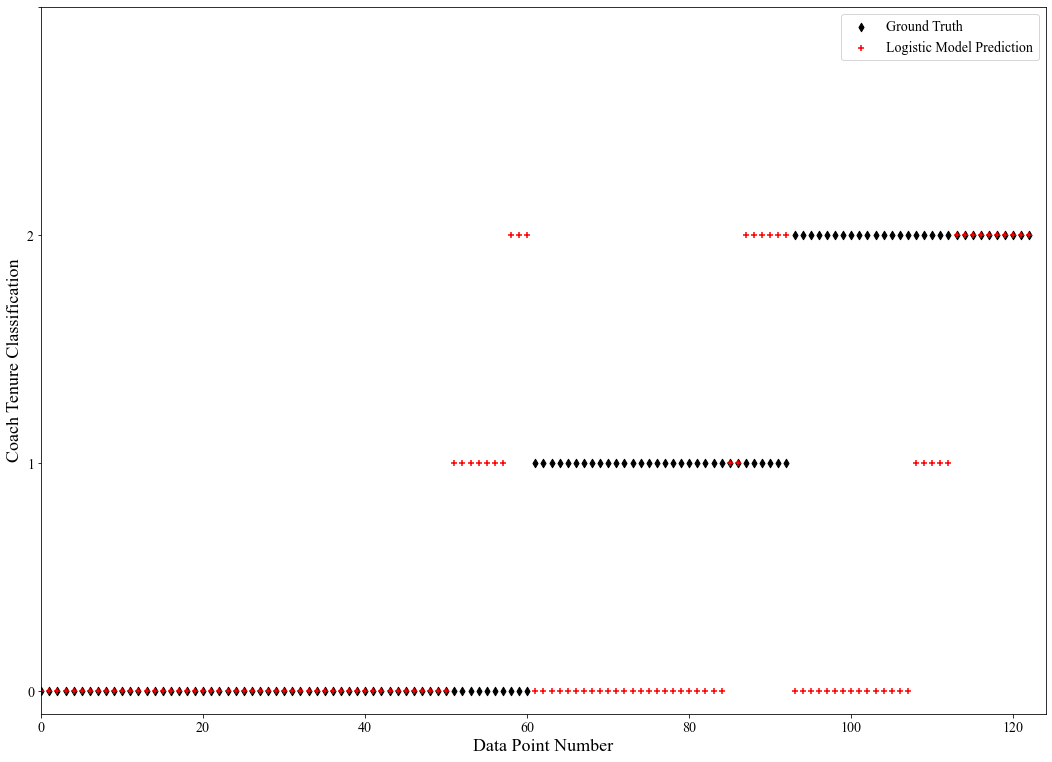

In [55]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='Logistic Model Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,""])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [56]:
print('AUROC: {:.3f}'.format(roc_auc_score(y_test, best_model.predict_proba(X_test__), average='macro', multi_class='ovr')))
print('AUROC When always preidcting class 0: {:.3f}'.format(roc_auc_score(y_test, [[1,0,0]] * len(X_test__), average='macro', multi_class='ovr')))

AUROC: 0.644
AUROC When always preidcting class 0: 0.500


These results show that the regularized logistic regression tends to predict class 0, the most frequent class, at a disproportionate rate. Nonetheless, the model does have a suurprisingly high weighted AUROC of .644. The AUROC when always predicting class 0 is .500, showing that the logistic regression does provide useful differentiation and adds value to tenure prediction.

## Model 2: XGBoost Classifier

Necessary Imports:

In [57]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

As before, we will implement the model with external cross-validation. Because xgboost does not have internal cross validation to choose hyperparameters, it is necessary to implement hyperparameter cross-validation via `GridSearchCV`.

In [58]:
"""
xgbr_param_dict = {
    "n_estimators":     [10, 25, 50, 100, 200],
    "learning_rate":    [.01, .05, .1, .2],
    "max_depth":        [2, 4, 6, 8, 10],
    "gamma":            [0, .001, .01, .1],
    "reg_lambda":       [0, .01, .1]
}
"""
xgbr_param_dict = {
    "n_estimators":     [25, 50, 100],
    "learning_rate":    [.05, .1, .2, .3],
    "max_depth":        [2, 3],
    "gamma":            [0, .01, .1],
    "reg_lambda":       [0, .01] 
}

xgbr_best_params_dict = {key: [] for key in xgbr_param_dict.keys()}

xgbr_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}
default_xgbr_params = {
    'verbosity':    1,
    'objective':    'multi:softprob',
    'n_jobs':       1
}

num_of_folds=10

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(XGBClassifier(**default_xgbr_params), param_grid=xgbr_param_dict, scoring='roc_auc_ovr', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        xgbr_best_params_dict[key].append(value)
    best_model = model.best_estimator_
    xgbr_result_dict['importance'].append(best_model.feature_importances_)

    tr_pred = best_model.predict_proba(X_train__)
    te_pred  = best_model.predict_proba(X_test__)

    xgbr_result_dict['test_score'].append(roc_auc_score(y_test_, te_pred, average='macro', multi_class='ovr'))
    xgbr_result_dict['train_score'].append(roc_auc_score(y_train_, tr_pred, average='macro', multi_class='ovr'))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 689 out of 720 | elapsed:   14.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 689 out of 720 | elapsed:   14.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   14.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.3s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.5s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 689 out of 720 | elapsed:   14.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.5s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 689 out of 720 | elapsed:   14.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.1s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 689 out of 720 | elapsed:   14.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   15.2s finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   17.3s finished


In [59]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(xgbr_result_dict['train_score']), np.mean(xgbr_result_dict['test_score'])))

Average Train AUROC: 0.938
Average Test AUROC: 0.664


In [60]:
xgbr_best_params_dict

{'n_estimators': [25, 25, 25, 50, 50, 100, 50, 25, 50, 100],
 'learning_rate': [0.2, 0.05, 0.05, 0.2, 0.1, 0.2, 0.05, 0.3, 0.05, 0.05],
 'max_depth': [3, 3, 3, 2, 3, 2, 3, 2, 3, 3],
 'gamma': [0.01, 0.1, 0, 0.01, 0, 0.01, 0.1, 0.01, 0.1, 0.1],
 'reg_lambda': [0, 0, 0, 0.01, 0.01, 0.01, 0, 0.01, 0.01, 0]}

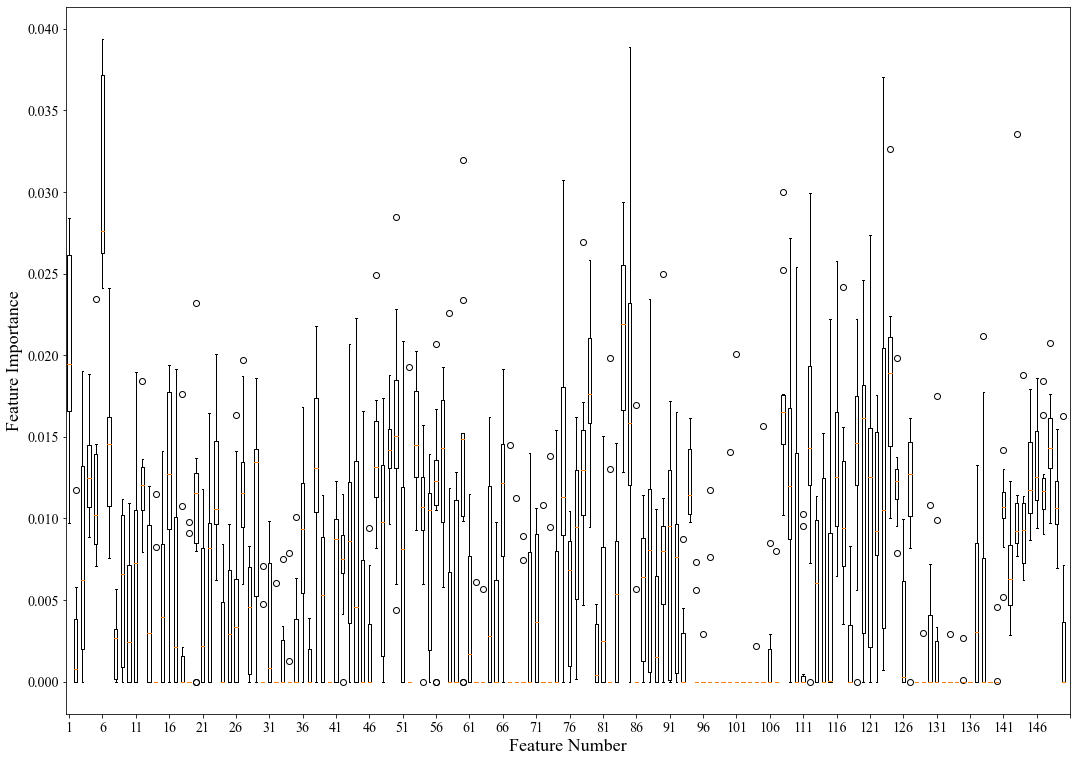

In [61]:
xgbr_coef_list = [np.abs(l) for l in zip(*xgbr_result_dict['importance'])]
xgbr_label_list = [item.split()[-1] for item in X.columns.values]
xgbr_label_list.append("")
plt.boxplot(xgbr_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1, 5), labels=xgbr_label_list[::5])
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [62]:
print_feature_importances(xgbr_result_dict['importance'], X.columns.values)

Rank  1: Feature 6, has an avg. importance of 0.0308 with a std. dev. of 0.0057.
Rank  2: Feature 84, has an avg. importance of 0.0212 with a std. dev. of 0.0057.
Rank  3: Feature 1, has an avg. importance of 0.0200 with a std. dev. of 0.0062.
Rank  4: Feature 124, has an avg. importance of 0.0188 with a std. dev. of 0.0060.
Rank  5: Feature 85, has an avg. importance of 0.0180 with a std. dev. of 0.0105.
Rank  6: Feature 79, has an avg. importance of 0.0179 with a std. dev. of 0.0044.
Rank  7: Feature 108, has an avg. importance of 0.0175 with a std. dev. of 0.0056.
Rank  8: Feature 112, has an avg. importance of 0.0156 with a std. dev. of 0.0084.
Rank  9: Feature 50, has an avg. importance of 0.0155 with a std. dev. of 0.0068.
Rank 10: Feature 53, has an avg. importance of 0.0148 with a std. dev. of 0.0036.
Rank 11: Feature 148, has an avg. importance of 0.0148 with a std. dev. of 0.0029.
Rank 12: Feature 49, has an avg. importance of 0.0143 with a std. dev. of 0.0025.
Rank 13: Featu

The previously printed RMSE values show that the heavily cross-validated XGBoost has a better performance on both the testing and training sets within the cross validation. The performance on the test sets is quite remarkable at .938. This value is notable because the model was built using `GridSearchCV` with internal cross-validation. These results show that the model was able to create some generalizable functionality. Before moving on to the next model, let's visualize the predictions of a model with the best average parameters on the held out test set.

In [63]:
plot_pred = None
xgbr = None
X_test__ = None
# Loop only exists to limit variable scope.
for i in [1]:
    test_xgbr_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in xgbr_best_params_dict.items()}
    test_xgbr_best_params_dict.update(default_xgbr_params)
    print(test_xgbr_best_params_dict)
    mean_imputer   = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train)
    X_test__       = mean_imputer.transform(X_test)
    xgbr = XGBClassifier(**test_xgbr_best_params_dict).fit(X_train__, y_train)
    plot_pred = xgbr.predict(X_test__)

{'n_estimators': 25, 'learning_rate': 0.05, 'max_depth': 3, 'gamma': 0.1, 'reg_lambda': 0, 'verbosity': 1, 'objective': 'multi:softprob', 'n_jobs': 1}


In [64]:
xgbr.save_model('XGBC_best_params')

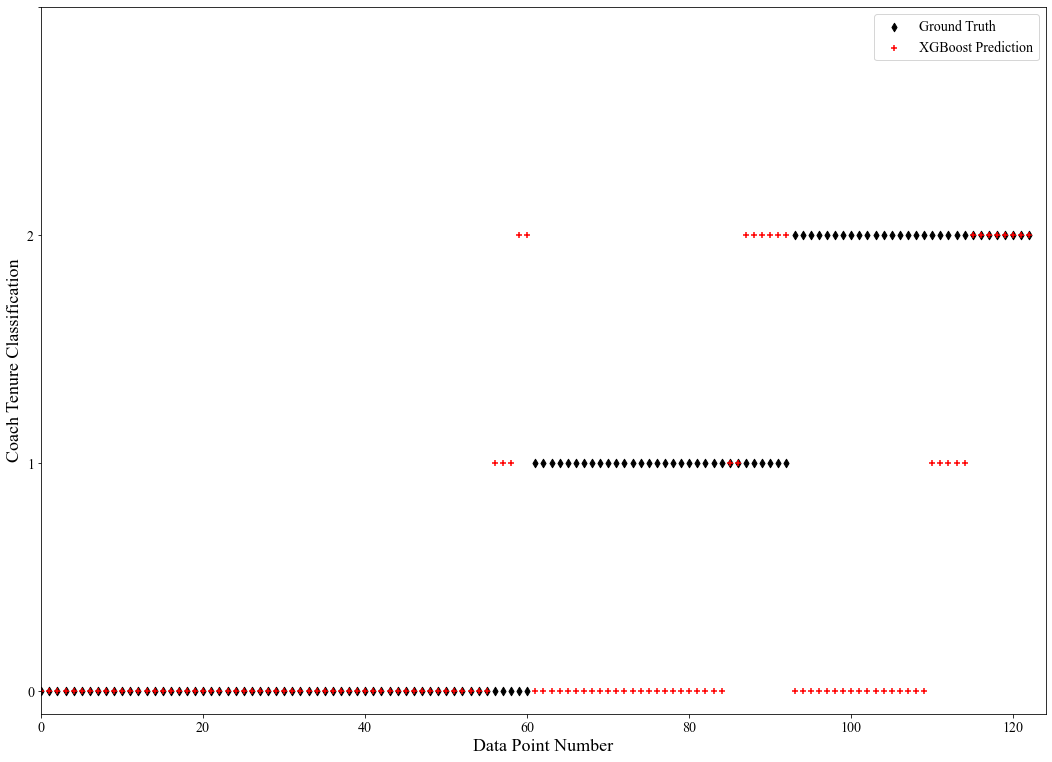

In [65]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='XGBoost Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,""])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [66]:
print('Average AUROC: {:.3f}'.format(roc_auc_score(y_test, xgbr.predict_proba(X_test__), average='macro', multi_class='ovr')))

Average AUROC: 0.674


The previous plot shows that the XGBoost model has an impressive AUROC of .674. This is better than the logistic regression model, which had an AUROC of .644 on the same held-out test set. These test results show some promise of predicitive value.

In [67]:
def print_predictions(mod, arr, tenure_list):
    integer_lookup_list = []
    count = 0
    probas = mod.predict_proba(arr)
    for tenure in mod.predict(arr):
        if tenure in tenure_list:
            integer_lookup_list.append((count, probas[count]))  
        count += 1
    return integer_lookup_list

## Model 3: MLPClassifier

Necessary Imports:

In [68]:
from sklearn.neural_network import MLPClassifier

In [69]:

mlpc_param_dict = {
    "alpha":            [0, .0001, .001, .01],
    "tol":              [1e-4, 1e-5],
    "max_iter":         [200, 300, 400, 500]
    #"hidden_layer_sizes":   [(100,), (50, 25,), (50, 25, 15, 9,), (100, 100, 50, 50,),]
}
"""
mlpc_param_dict = {
    "activation":       ['relu', 'tanh'],
    "alpha":            [0, .0001, .001]
}
"""
mlpc_best_params_dict = {key: [] for key in mlpc_param_dict.keys()}

mlpc_result_dict = {    'train_score':  [],
                        'test_score':   [],
                        'importance':   []
}

default_mlpc_params = {
    'solver':       'lbfgs',
    "activation":   'relu'
}

num_of_folds=10

skf=StratifiedKFold(n_splits=num_of_folds, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    X_train_, X_test_ = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_, y_test_ = y_train.iloc[train_index].values.ravel(), y_train.iloc[test_index].values.ravel()

    mean_imputer = SimpleImputer()
    X_train__      = mean_imputer.fit_transform(X_train_)
    X_test__       = mean_imputer.transform(X_test_)

    model = GridSearchCV(MLPClassifier(**default_mlpc_params), param_grid=mlpc_param_dict, scoring='roc_auc_ovr', n_jobs=-1, cv=5, verbose=1).fit(X_train__, y_train_)
    for key, value in model.best_params_.items():
        mlpc_best_params_dict[key].append(value)
    best_model = model.best_estimator_

    tr_pred = best_model.predict_proba(X_train__)
    te_pred  = best_model.predict_proba(X_test__)

    mlpc_result_dict['test_score'].append(roc_auc_score(y_test_, te_pred, average='macro', multi_class='ovr'))
    mlpc_result_dict['train_score'].append(roc_auc_score(y_train_, tr_pred, average='macro', multi_class='ovr'))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.5s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.6s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   19.6s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.9s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.2s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.5s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.1s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   18.1s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   17.9s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   17.8s finished
C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [70]:
print('Average Train AUROC: {:.3f}\nAverage Test AUROC: {:.3f}'.format(np.mean(mlpc_result_dict['train_score']), np.mean(mlpc_result_dict['test_score'])))

Average Train AUROC: 0.887
Average Test AUROC: 0.597


In [71]:
test_mlpc_best_params_dict = {key: max(set(value), key=value.count) for (key, value) in mlpc_best_params_dict.items()}
print(test_mlpc_best_params_dict)
test_mlpc_best_params_dict.update(default_mlpc_params)
mean_imputer    = SimpleImputer()
imputed_X_train = mean_imputer.fit_transform(X_train)
imputed_X_test  = mean_imputer.transform(X_test)
mlpc = MLPClassifier(**test_mlpc_best_params_dict).fit(imputed_X_train, y_train)
plot_pred = mlpc.predict(imputed_X_test)

{'alpha': 0.0001, 'tol': 0.0001, 'max_iter': 200}


C:\ProgramData\Anaconda3\envs\Py37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [72]:
mlpc_best_params_dict

{'alpha': [0.0001, 0.0001, 0, 0.01, 0.001, 0.01, 0.001, 0.0001, 0.001, 0.01],
 'tol': [0.0001,
  0.0001,
  0.0001,
  1e-05,
  1e-05,
  0.0001,
  0.0001,
  1e-05,
  1e-05,
  0.0001],
 'max_iter': [300, 200, 200, 200, 300, 200, 200, 200, 200, 200]}

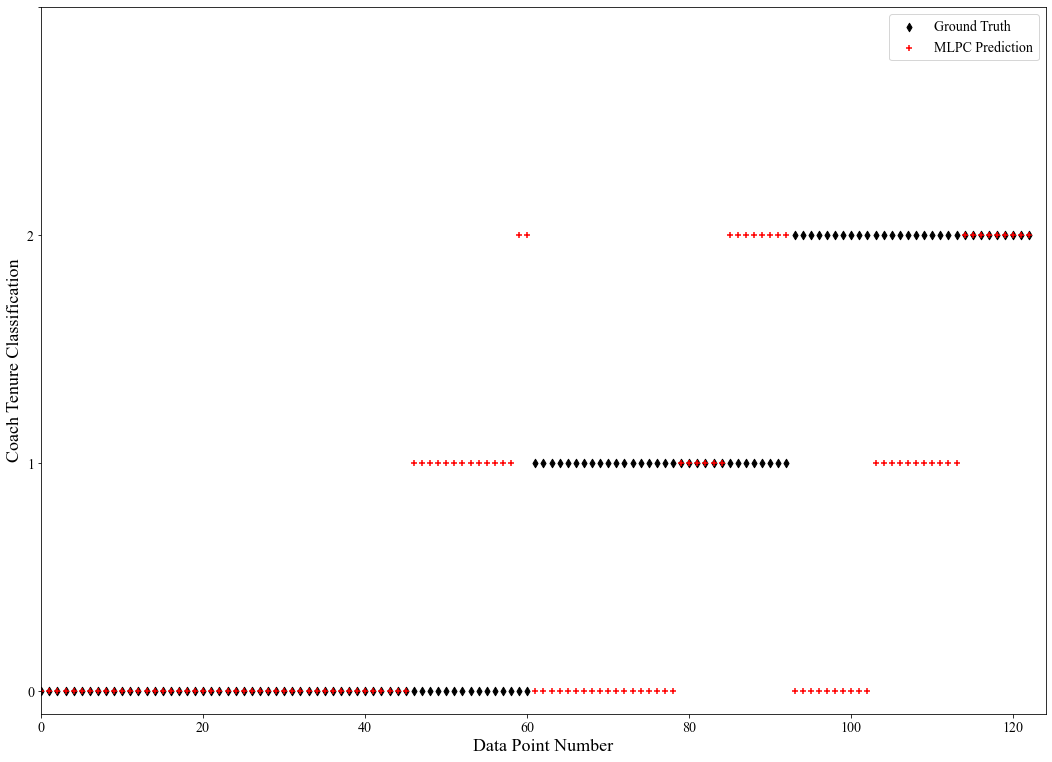

In [73]:
sorted_y_test, sorted_plot_pred = [list(tuple) for tuple in zip(*sorted(zip(y_test, plot_pred)))]
plt.scatter(np.arange(0, len(sorted_y_test)), sorted_y_test, marker='d', color='k', label='Ground Truth')
plt.scatter(np.arange(0, len(sorted_plot_pred)), sorted_plot_pred, marker='+', color='r', label='MLPC Prediction')
plt.xlabel('Data Point Number')
plt.ylabel('Coach Tenure Classification')
plt.yticks([0,1,2,3], labels=[0,1,2,""])
plt.xlim(0, len(sorted_plot_pred) + 1)
plt.legend()
plt.show()

In [74]:
print('Average AUROC: {:.3f}'.format(roc_auc_score(y_test, mlpc.predict_proba(imputed_X_test), average='macro', multi_class='ovr')))

Average AUROC: 0.629


In [75]:
for index, probas in print_predictions(xgbr, imputed_X_test, [1]):
    print('{:<22} {:>4} {:>2} {}'.format(df.loc[X_test.iloc[index].name]['Coach Name'], df.loc[X_test.iloc[index].name]['Year'], df.loc[X_test.iloc[index].name]['Coach Tenure Class'], probas))

Mike Smith             2008  2 [0.32240006 0.36528665 0.3123133 ]
Dick Nolan             1968  2 [0.25079447 0.37490883 0.3742967 ]
Andy Reid              2013  2 [0.30822706 0.40398142 0.28779152]
Mike Holmgren          1999  2 [0.30329964 0.37357375 0.32312664]
Phil Bengtson          1972  0 [0.23184147 0.52833223 0.23982632]
Rick Venturi           1996  0 [0.28177643 0.44526294 0.2729606 ]
Weeb Ewbank            1970  1 [0.22111659 0.57031    0.20857337]
Bobby Ross             1997  1 [0.3399143  0.4340887  0.22599697]
Jon Gruden             2018  0 [0.30112723 0.36277148 0.33610126]
Jeff Fisher            1997  2 [0.3802265 0.4190659 0.2007076]


In [76]:
for index, probas in print_predictions(xgbr, imputed_X_test, [2]):
    print('{:<22} {:>4} {:>2} {}'.format(df.loc[X_test.iloc[index].name]['Coach Name'], df.loc[X_test.iloc[index].name]['Year'], df.loc[X_test.iloc[index].name]['Coach Tenure Class'], probas))

Bobby Petrino          2007  0 [0.32597244 0.2967536  0.377274  ]
Bruce Coslet           1990  1 [0.333438   0.30354995 0.36301205]
Jack Del Rio           2015  1 [0.3101806  0.3167486  0.37307084]
Butch Davis            2001  1 [0.3297592  0.3002009  0.37003985]
Tony Dungy             2002  2 [0.25045365 0.37410557 0.37544075]
June Jones             1994  1 [0.30824825 0.29663324 0.39511845]
Jim Dooley             1968  1 [0.3545443  0.26571852 0.37973717]
Lindy Infante          1988  1 [0.33413154 0.3041813  0.36168715]
Chuck Knox             1978  2 [0.32735345 0.25522292 0.41742367]
Jim Haslett            2000  2 [0.33915487 0.30875438 0.35209078]
Bill Belichick         1991  2 [0.31628937 0.28793842 0.39577222]
John Madden            1970  2 [0.27722478 0.33526498 0.38751024]
Mike Tomlin            2007  2 [0.26011854 0.3383915  0.40148994]
Mike Vrabel            2018  2 [0.33552438 0.3054493  0.35902634]
Harry Robb             1925  0 [0.32500985 0.29755685 0.37743324]
Mike Holmg

In [77]:
for index, probas in print_predictions(mlpc, imputed_X_test, [2]):
    print('{:<22} {:>4} {:>2} {}'.format(df.loc[X_test.iloc[index].name]['Coach Name'], df.loc[X_test.iloc[index].name]['Year'], df.loc[X_test.iloc[index].name]['Coach Tenure Class'], probas))

Bobby Petrino          2007  0 [0.00289954 0.0627958  0.93430466]
Mike Smith             2008  2 [0.12447662 0.38284989 0.49267349]
John Fox               2011  1 [0.19608103 0.33706551 0.46685346]
Alex Webster           1969  2 [0.36561679 0.20933376 0.42504945]
Bruce Coslet           1990  1 [0.3715671  0.12812697 0.50030593]
Cam Cameron            2007  0 [0.31798179 0.23788523 0.44413299]
Dick Nolan             1968  2 [0.02900558 0.22986296 0.74113146]
Steve Spagnuolo        2009  1 [0.31238488 0.0304398  0.65717532]
Gene Ronzani           1950  1 [0.33826776 0.09906764 0.5626646 ]
Jim Harbaugh           2011  1 [0.42527739 0.10305731 0.47166531]
Jim Dooley             1968  1 [0.30144791 0.10642442 0.59212767]
Lindy Infante          1988  1 [0.06846825 0.01607543 0.91545632]
Chuck Knox             1978  2 [0.02376044 0.10900821 0.86723135]
Jim Haslett            2000  2 [0.02009219 0.11274978 0.86715803]
Marty Schottenheimer   1989  2 [0.03387165 0.15370143 0.81242691]
Leeman Ben

As with previous models, MLP does not have a standard, quick way to understand feature importances. In order to combat this, we use LIME to estimate feature importances over the entire test set via data perturbation. The following code shows one example of an estimate for a random point in the test set. The display shows which features matter, in a positive and negative manner.

In [78]:
import lime
import lime.lime_tabular

In [79]:
explainer = lime.lime_tabular.LimeTabularExplainer(imputed_X_train, 
                                                   feature_names=list(X.columns.values), 
                                                   verbose=False, mode='regression')
random_index = np.random.randint(0, len(imputed_X_test))
exp = explainer.explain_instance(imputed_X_test[i], mlpc.predict)
exp.show_in_notebook(show_table=True)

In [82]:
mlpc_importance_dict = {key: [] for key in X.columns.values }

for i in np.arange(0, len(imputed_X_test)):
    print('Estimating feature importance for point {}'.format(i + 1))
    exp = explainer.explain_instance(imputed_X_test[i], mlpc.predict)
    for tuple_ in exp.as_list():
        label, weight = tuple_
        start_index = label.find('Feature')
        feature = label[start_index:start_index + 10].strip()
        mlpc_importance_dict[feature].append(float(weight))

Estimating feature importance for point 1
Estimating feature importance for point 2
Estimating feature importance for point 3
Estimating feature importance for point 4
Estimating feature importance for point 5
Estimating feature importance for point 6
Estimating feature importance for point 7
Estimating feature importance for point 8
Estimating feature importance for point 9
Estimating feature importance for point 10
Estimating feature importance for point 11
Estimating feature importance for point 12
Estimating feature importance for point 13
Estimating feature importance for point 14
Estimating feature importance for point 15
Estimating feature importance for point 16
Estimating feature importance for point 17
Estimating feature importance for point 18
Estimating feature importance for point 19
Estimating feature importance for point 20
Estimating feature importance for point 21
Estimating feature importance for point 22
Estimating feature importance for point 23
Estimating feature i

In [83]:
mlpc_coef_list = [l for l in mlpc_importance_dict.values()]

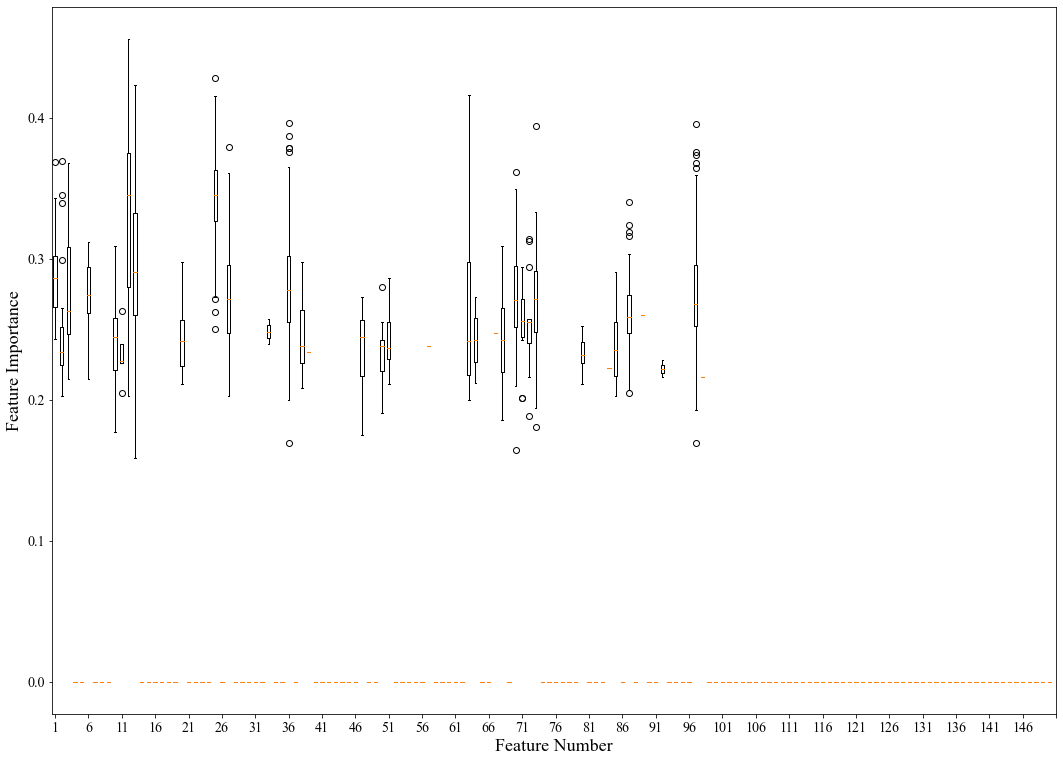

In [84]:
mlpc_coef_list  = [np.abs(l) if l != [] else 0 for l in mlpc_importance_dict.values()]
mlpc_label_list = [item.split()[-1] for item in X.columns.values]
mlpc_label_list.append("")
plt.boxplot(mlpc_coef_list)
plt.xticks(np.arange(1, len(xgbr_label_list) + 1, 5), labels=mlpc_label_list[::5])
plt.ylabel('Feature Importance')
plt.xlabel('Feature Number')
plt.show()

In [85]:
feature_avg_weight_dict = dict(zip(mlpc_label_list[0:-1], [np.mean(l) for l in zip(mlpc_coef_list)]))
feature_std_weight_dict = dict(zip(mlpc_label_list[0:-1], [np.std(l) for l in zip(mlpc_coef_list)]))
feature_avg_weight_dict = dict(sorted(feature_avg_weight_dict.items(), key=lambda x: x[1], reverse=True))
count = 1
for key, value in feature_avg_weight_dict.items():
    print('Rank {:>2}: {}, has an avg. importance of {:.4f} with a std. dev. of {:.4f}.'.format(count, key, value, feature_std_weight_dict[str(key)]))
    count += 1

Rank  1: 25, has an avg. importance of 0.3448 with a std. dev. of 0.0314.
Rank  2: 12, has an avg. importance of 0.3318 with a std. dev. of 0.0586.
Rank  3: 13, has an avg. importance of 0.2961 with a std. dev. of 0.0528.
Rank  4: 1, has an avg. importance of 0.2867 with a std. dev. of 0.0268.
Rank  5: 36, has an avg. importance of 0.2817 with a std. dev. of 0.0450.
Rank  6: 3, has an avg. importance of 0.2764 with a std. dev. of 0.0380.
Rank  7: 97, has an avg. importance of 0.2758 with a std. dev. of 0.0424.
Rank  8: 6, has an avg. importance of 0.2753 with a std. dev. of 0.0223.
Rank  9: 73, has an avg. importance of 0.2733 with a std. dev. of 0.0524.
Rank 10: 70, has an avg. importance of 0.2730 with a std. dev. of 0.0491.
Rank 11: 27, has an avg. importance of 0.2729 with a std. dev. of 0.0349.
Rank 12: 87, has an avg. importance of 0.2605 with a std. dev. of 0.0249.
Rank 13: 89, has an avg. importance of 0.2599 with a std. dev. of 0.0000.
Rank 14: 63, has an avg. importance of 0.

The Neural Network performs moderatley worse than XGBoost on the held out test set, and performs better than the logistic regression. These results show valuable insight that these models may be able to provide predictive value in head coach hiring decisions in the NFL. The MLP feature importance weights differ greatly from the previous models.